<a target="_blank"  href="https://www.birmingham.ac.uk/schools/chemical-engineering/index.aspx"><img src="https://intranet.birmingham.ac.uk/staff/images/brand/download/jpg/crested-wm-full-colour.jpg" style="height:200px; display: block; margin-left: auto; margin-right: auto;"/></a>

# Image Processing Examples with OpenCV

---

## Labs And Data Analysis 2
### For engineers and other people who just want a computer to do their work.

---

#### Copyright 2022 The University of Birmingham, School of Chemical Engineering.
##### Authored by Andrei Leonard Nicusan with help from Dr. Kit Windows-Yule.

Licensed under the GNU License, Version 3.0 (the "License").

OpenCV is a mature, feature-complete library - natively written in optimised C++ code - with a Python interface. While Portfolio Work 3 / 4 is deliberately very open and invites you to use any tool, programming language or library you deem necessary, OpenCV is a very good starting point - and along with NumPy and Matplotlib, all you need. The most important resources for using it are:
- This example-based notebook.
- OpenCV Python [examples](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html).
- OpenCV [documentation](https://docs.opencv.org/4.1.2/d2/d96/tutorial_py_table_of_contents_imgproc.html).
- Google.

In [ ]:
# Download image from URL - it will be available in the folder tab on the left. You can upload your
# own images to Colab if you wish, or do your analysis locally on your computer
!curl https://cdn.pixabay.com/photo/2016/03/26/14/31/euro-1280666_960_720.jpg --output coin.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63050  100 63050    0     0   947k      0 --:--:-- --:--:-- --:--:--  962k


# 1. Reading in Image

The newer OpenCV interface `cv2` is fully integrated with NumPy and reads in images as simple arrays:



Shape of image array: (635, 960, 3)


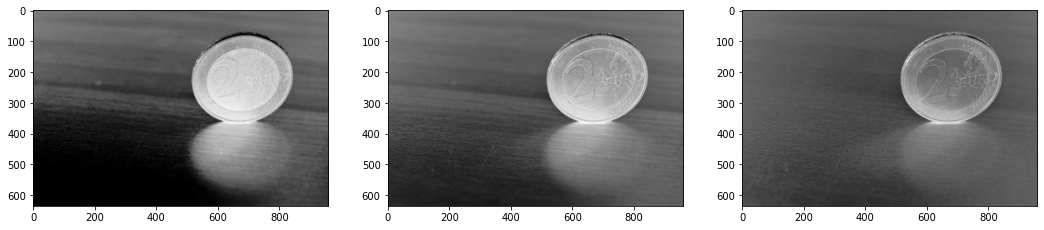

In [ ]:
# Read in 3-channel (RGB) image into a NumPy array
import numpy as np

import cv2
import matplotlib.pyplot as plt


img = cv2.imread('coin.jpg', cv2.IMREAD_UNCHANGED)
print(f"Shape of image array: {img.shape}")


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img[:, :, 0])
axes[1].imshow(img[:, :, 1])
axes[2].imshow(img[:, :, 2])


In [ ]:
img[:, :, 0]

array([[147, 148, 150, ..., 153, 154, 155],
       [147, 148, 149, ..., 154, 154, 154],
       [148, 148, 148, ..., 155, 155, 155],
       ...,
       [255, 255, 255, ..., 215, 218, 219],
       [255, 255, 255, ..., 215, 218, 219],
       [255, 255, 255, ..., 215, 218, 218]], dtype=uint8)

OpenCV documentation [link](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) for `imread`.

Shape of image array: (635, 960)


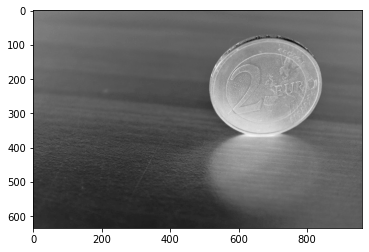

In [ ]:
# Read in Grayscale image into a NumPy array
img = cv2.imread('coin.jpg', cv2.IMREAD_GRAYSCALE)
print(f"Shape of image array: {img.shape}")

plt.set_cmap("Greys")
plt.imshow(img)

Notice the flags given to `cv2.imread` which control how the images are read into NumPy arrays. A full list is given [here](https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html).

## 1.1. Cropping an Image

(635, 960)


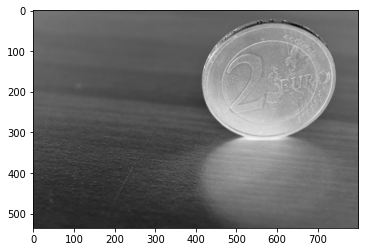

In [ ]:
print(img.shape)

img_cropped = img[50:-50, 100:900]
plt.imshow(img_cropped)

In [ ]:
img

array([[151, 152, 154, ..., 157, 158, 159],
       [151, 152, 153, ..., 158, 158, 158],
       [152, 152, 152, ..., 159, 159, 159],
       ...,
       [216, 216, 216, ..., 187, 188, 189],
       [216, 216, 216, ..., 187, 188, 189],
       [216, 216, 216, ..., 187, 188, 188]], dtype=uint8)

In [ ]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [ ]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

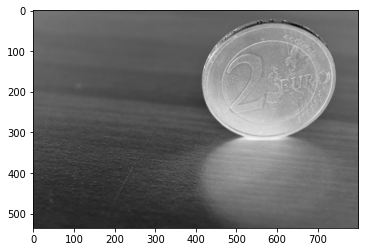

In [ ]:
img_cropped_larger = img_cropped.astype(np.uint16) * 10
plt.imshow(img_cropped_larger)

# 2. Thresholding / Binarisation

OpenCV documentation [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html) for `cv2.threshold`.

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


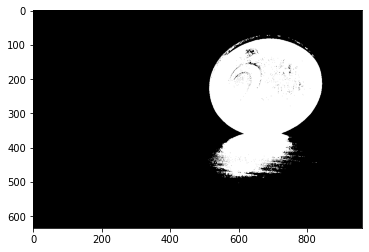

In [ ]:
# Simple threshold: cv2.threshold(image, thresh, maxval, type)
#       - image: the source image
#       - thresh: values below this will be set to zero
#       - maxval: values above `thresh` will be set to `maxval`
#       - type: thresholding type
_, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
print(thresh)
plt.imshow(thresh)

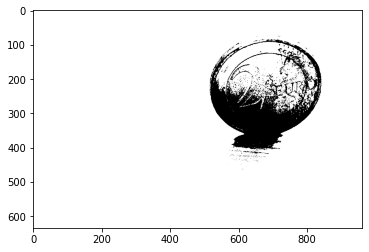

In [ ]:
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

# 3. Smoothing / Blurring

OpenCV documentation [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html) for blurring.

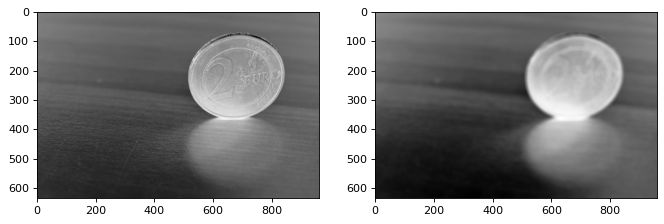

In [ ]:
# Blurring, in the matrix sense, is setting each pixel's value to the (weighted) average of its
# neighbours. The neighbours are taken as a square matrix (called `kernel`) around each pixel.
blurred = cv2.blur(img, (15, 15))   # Change kernel dimensions: (3, 3), (15, 15), (55, 55)

# Make plotted area larger
plt.figure(figsize = (10, 8), dpi = 80)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(blurred)

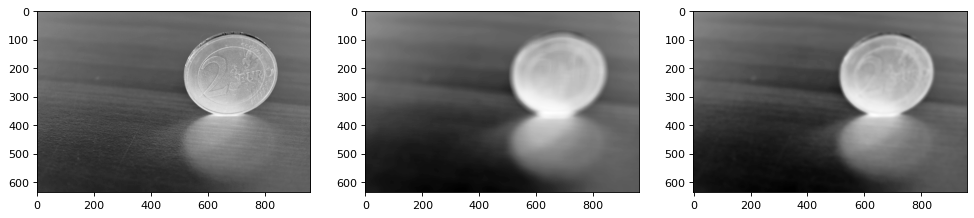

In [ ]:
# Gaussian blurring differs from averaging through its choice of weights around each pixel - instead
# of all being equal, the weights are chosen on a 2D Gaussian distribution centred at the kernel
# centre. What is the advantage of this approach?
#
# cv2.GaussianBlur(image, kernel, sigma)
#       - image: the source image to blur
#       - kernel: the kernel dimensions (e.g. `(5, 5)`), they must be odd
#       - sigma: the Gaussian distribution's standard deviation. If zero, it is set automatically.
simple = cv2.blur(img, (25, 25))
gaussian = cv2.GaussianBlur(img, (25, 25), 0)

# Make plotted area larger
plt.figure(figsize = (15, 15), dpi = 80)

plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(simple)

plt.subplot(133)
plt.imshow(gaussian)

# 4. Morphological Operations: Erosion, Dilation

OpenCV documentation [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) for morphological operations.

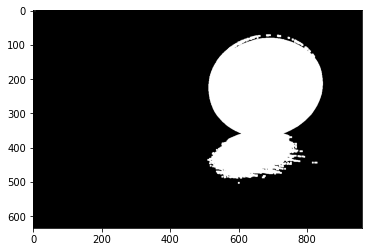

In [ ]:
_, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), dtype = np.uint8)
erosion = cv2.erode(thresh, kernel)

plt.imshow(erosion)

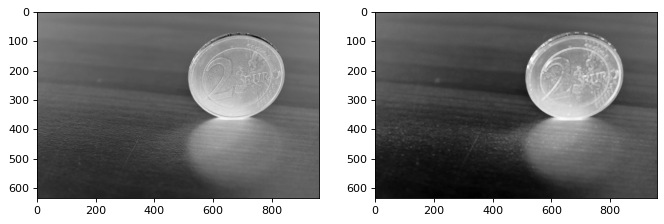

In [ ]:
# Here the kernel must be created and given explicitly. This is simple with NumPy's `ones` function
# which creates an array filled with ones. Most image operations are done in integer math (not
# floats), so OpenCV expects the kernel to have 8-bit unsigned integers (uint8)
kernel = np.ones((5, 5), dtype = np.uint8)
erosion = cv2.erode(img, kernel)

# Make plotted area larger
plt.figure(figsize = (10, 8), dpi = 80)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(erosion)

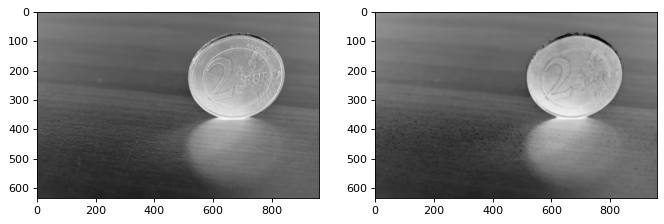

In [ ]:
kernel = np.ones((5, 5), dtype = np.uint8)
dilation = cv2.dilate(img, kernel)

# Make plotted area larger
plt.figure(figsize = (10, 8), dpi = 80)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(dilation)

## 4.1. Extra: Finding Information on Numeric Types

In [ ]:
# Finding an *integer* numeric type's limits
print(np.iinfo(np.uint8))
print(np.iinfo(np.int8))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------



In [ ]:
# Finding a *floating-point* numeric type's limits
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

# 5. Histogram Equalisation

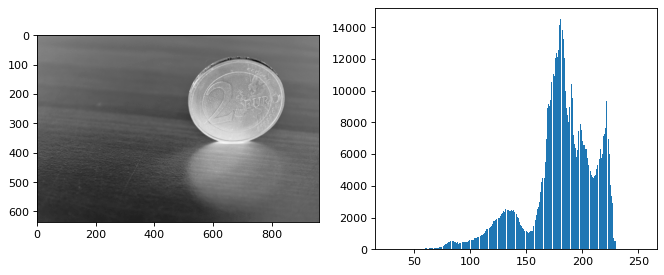

In [ ]:
# Don't forget images read by OpenCV are just NumPy arrays. You can do anything with an image that
# you can with an array: mathematical operations, histograms, finding minima, etc.

# Make plotted area larger
plt.figure(figsize = (10, 4), dpi = 80)

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.hist(img.flatten(), bins = 256)

plt.show()

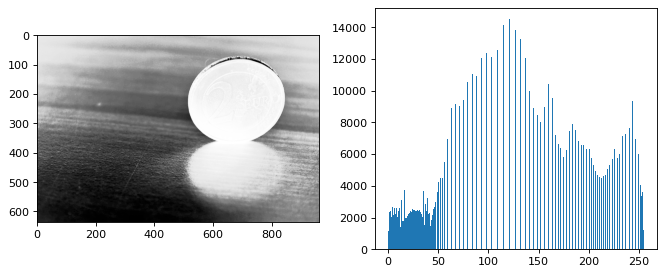

In [ ]:
# Equalise image's histogram
eqhist = cv2.equalizeHist(img)

# Make plotted area larger
plt.figure(figsize = (10, 4), dpi = 80)

plt.subplot(121)
plt.imshow(eqhist)

plt.subplot(122)
plt.hist(eqhist.flatten(), bins = 256)

plt.show()

# 6. Hough Circle Transform

OpenCV documentation [link](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d).

In [ ]:
img = cv2.imread('coin.jpg', cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), dtype = np.uint8)
erosion = cv2.erode(thresh, kernel)

circles = cv2.HoughCircles(
    erosion,
    cv2.HOUGH_GRADIENT, 1,
    minDist = 40,
    param1 = 50, param2 = 22,
    minRadius = 20, maxRadius=0,
)

# circles[0] has three columns: x, y, radius for each circle, given in pixel dimensions
circles

array([[[674.5, 212.5, 166.7]]], dtype=float32)

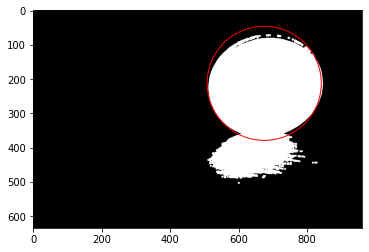

In [ ]:
fig, ax = plt.subplots()

ax.imshow(erosion)

for circ in circles[0]:
    x, y, r = circ
    ax.add_artist(plt.Circle((x, y), r, fill = False, color = "red"))

fig.show()

array([[[688.5, 214.5, 154.1]]], dtype=float32)

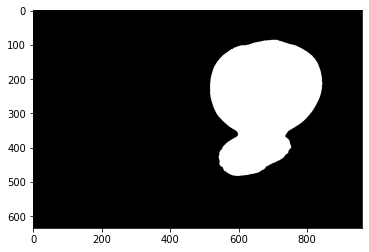

In [ ]:
# Find circles in an image:
#       img: source image
#       method: method to find circles, almost always `cv2.HOUGH_GRADIENT`
#       dp: resolution ratio of box in which circles are searched, 1 is whole image, 2 is half image
#       minDist: minimum distance between found circles
#       param1: edge detection threshold, greater values need sharper circle edges
#       param2: circularity threshold, greater values need more perfect circles
#       minRadius: minimum allowed circle radius
#       maxRadius: maximum allowed circle radius. If zero, find all circles.

# First blur the image to remove some noise
blurred = cv2.blur(img, (25, 25))

# Then threshold the image
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

# Erode then dilate 
kernel = np.ones((5, 5), dtype = np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 1)

plt.imshow(closed)

circles = cv2.HoughCircles(
    closed,
    cv2.HOUGH_GRADIENT, 1,
    minDist = 60,
    param1 = 50, param2 = 15,
    minRadius = 40, maxRadius=0,
)

# circles[0] has three columns: x, y, radius for each circle, given in pixel dimensions
circles

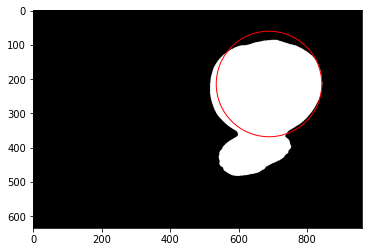

In [ ]:
fig, ax = plt.subplots()

ax.imshow(closed)

for circ in circles[0]:
    x, y, r = circ
    ax.add_artist(plt.Circle((x, y), r, fill = False, color = "red"))

fig.show()

# 7. Iterating Frames from a Video

OpenCV documentation [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html) for handling videos.

In [ ]:
# Download a sample video
!git clone https://github.com/anicusan/samples-teaching

Cloning into 'samples-teaching'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


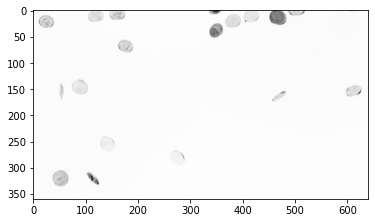

In [ ]:
# Open a video into a frame-by-frame iterator with OpenCV.
# A single frame can be accessed with `video.read()`
video = cv2.VideoCapture("samples-teaching/coins.mp4")

# Read the first 80 frames
for i in range(280):
    ret, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)      # Convert RGB image to Grayscale

# Close video
video.release()

# Plot the last frame read
plt.imshow(gray)

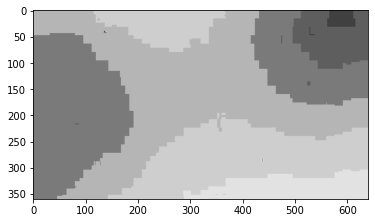

In [ ]:
# Iterate through all frames in a video
video = cv2.VideoCapture("samples-teaching/coins.mp4")

# Read in all frames until a `None` is found (i.e. video is finished)
while True:
    ret, frame = video.read()
    if frame is None:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)      # Convert RGB image to Grayscale

# Close video
video.release()

# Plot the last frame read
plt.imshow(gray)